# Exercise 2.1

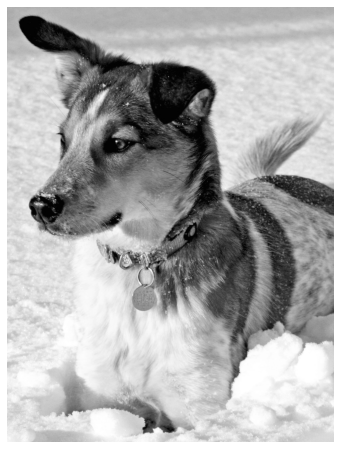

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

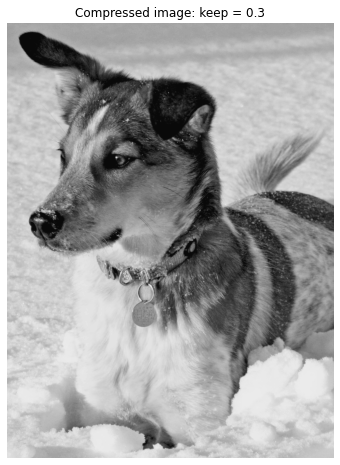

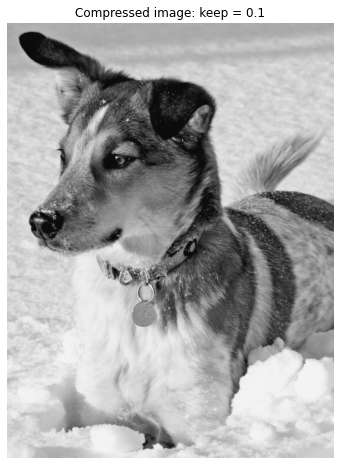

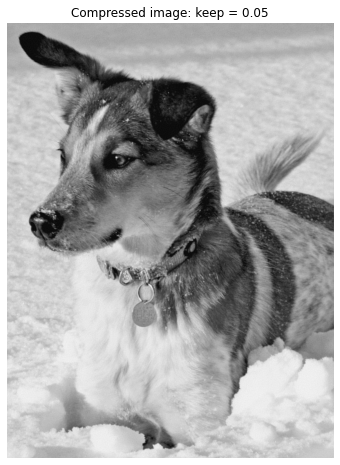

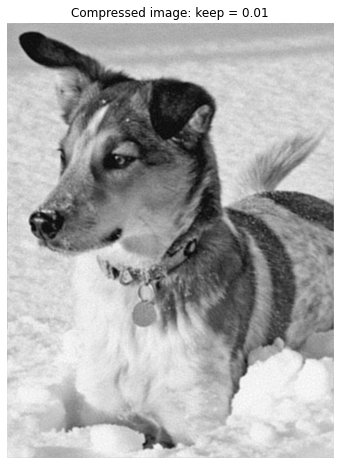

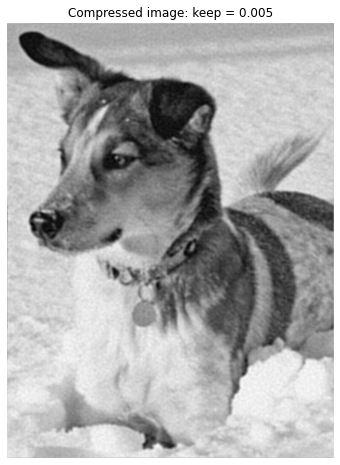

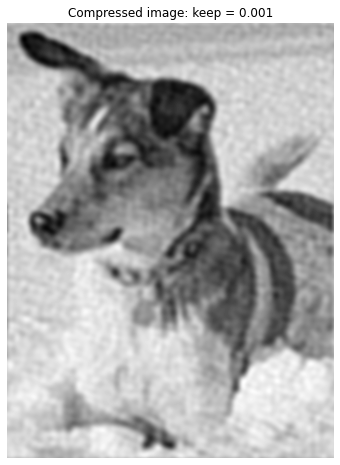

In [6]:
Bt = np.fft.fft2(X)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
error=[]
for keep in (0.3, 0.1, 0.05, 0.01, 0.005, 0.001):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    e=np.linalg.norm(Alow-X, ord = 'fro')
    error.append(e)
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

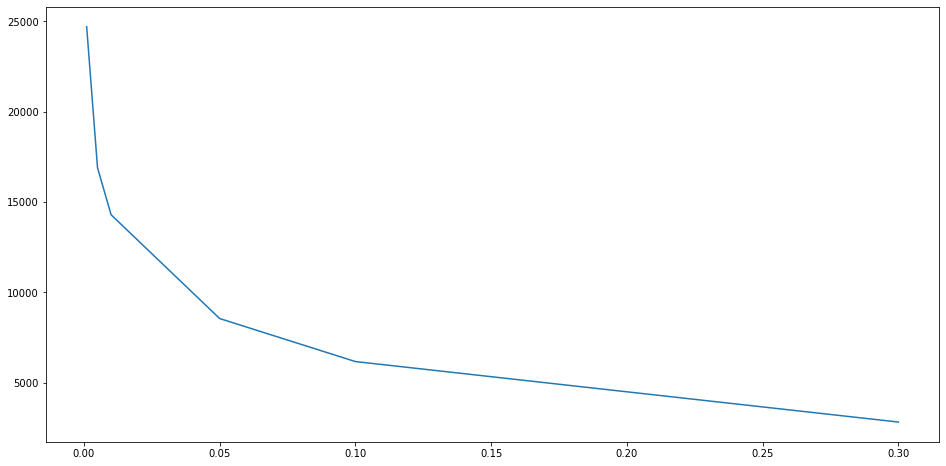

In [7]:
plt.figure()
plt.plot((0.3, 0.1, 0.05, 0.01, 0.005, 0.001), error)

# Exercise 2.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams.update({'font.size': 18})

# Define domain
dx = 0.001
L = 2
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

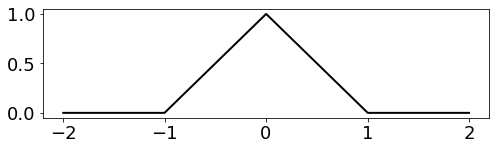

In [2]:
# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)

Text(0.5, 1.0, 'Fourier Coefficients a[k]')

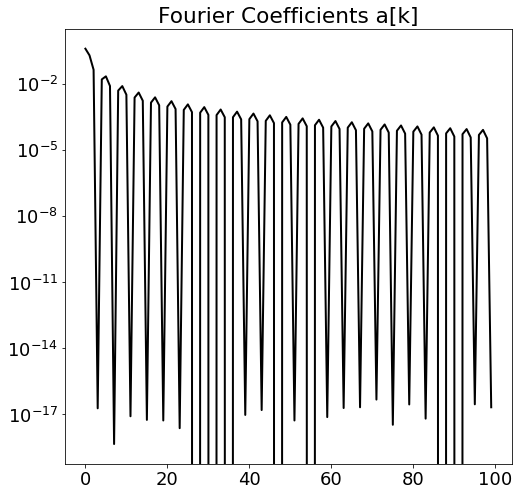

In [3]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

kmax=100
A = np.zeros(kmax)
B = np.zeros(kmax)
for k in range(kmax):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
plt.semilogy(np.arange(kmax),A,color='k',linewidth=2)
plt.title('Fourier Coefficients a[k]')

Text(0.5, 1.0, 'Fourier Coefficients b[k]')

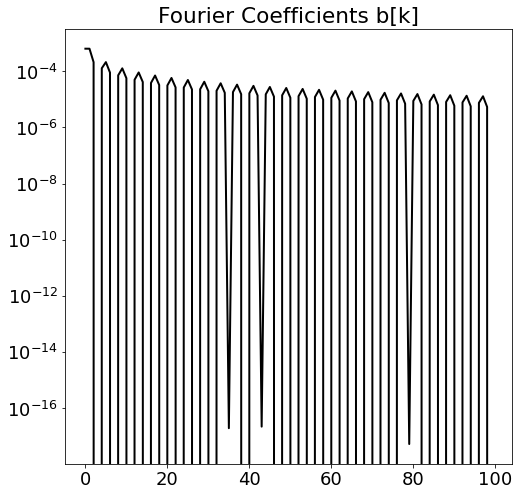

In [4]:
plt.semilogy(np.arange(kmax),B,color='k',linewidth=2)
plt.title('Fourier Coefficients b[k]')

In [5]:
kmax1=1000
A1 = np.zeros(kmax1)
B1 = np.zeros(kmax1)
for k in range(kmax1):
    A1[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B1[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx

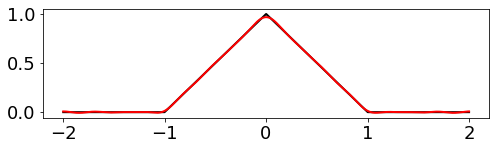

In [6]:
A1sort = np.sort(np.abs(A1))
B1sort = np.sort(np.abs(B1)) 
threshA1 = A1sort[-10]
threshB1 = B1sort[-10]
indA1 = np.abs(A1)>threshA1  # Find small indices
indB1 = np.abs(B1)>threshB1  
A1hat = A1 * indA1
B1hat = B1 * indB1

plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)
fFS1=A0/2
for k in range(kmax1):
    fFS1 = fFS1 + A1hat[k]*np.cos((k+1)*np.pi*x/L) + B1hat[k]*np.sin((k+1)*np.pi*x/L)
ax.plot(x,fFS1,'-',color='r',linewidth=2)